In [54]:
import cv2
from cv2 import VideoWriter, VideoWriter_fourcc
import numpy as np
import matplotlib.pyplot as plt
import imutils
import skimage.morphology
from skimage.morphology import square
from skimage import measure
import skimage.color
from scipy import ndimage
import os

first=1
cap = cv2.VideoCapture('../data/robot_parcours_1.avi')
imgs = []
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  imgs.append(frame)
  if ret == True:
    cv2.imshow('Frame',frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
  else: 
    break
cap.release()
cv2.destroyAllWindows()

<class 'str'>


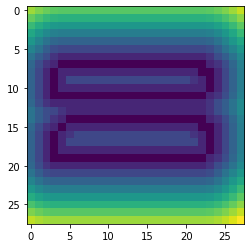

In [2]:
distanceMaps = []
distanceMaps.append(np.load("../data/zero.npy"))
distanceMaps.append(np.load("../data/one.npy"))
distanceMaps.append(np.load("../data/two.npy"))
distanceMaps.append(np.load("../data/three.npy"))
distanceMaps.append(np.load("../data/four.npy"))
distanceMaps.append(np.load("../data/five.npy"))
distanceMaps.append(np.load("../data/six.npy"))
distanceMaps.append(np.load("../data/seven.npy"))
distanceMaps.append(np.load("../data/eight.npy"))
distanceMaps.append(np.load("../data/plus.npy"))
distanceMaps.append(np.load("../data/minus.npy"))
distanceMaps.append(np.load("../data/multiplication.npy"))
distanceMaps.append(np.load("../data/division.npy"))
distanceMaps.append(np.load("../data/equals.npy"))

plt.imshow(distanceMaps[13])

In [3]:
div = []
n = 0
for l in range(14):
    n = 0
    for i in range(28):
        for j in range(28):
            if distanceMaps[l][i][j] == 0:
                n +=1
    div.append(n)
    print(l, "->", n)

0 -> 103
1 -> 56
2 -> 102
3 -> 78
4 -> 74
5 -> 101
6 -> 101
7 -> 88
8 -> 105
9 -> 76
10 -> 47
11 -> 89
12 -> 77
13 -> 93


In [44]:
def center_arrow(img):
    h,w = img.shape
    
    X_center = []
    Y_center = []
    
    for i in range(h):
        for j in range(w):
            if img[i][j] != 0:
                X_center.append(i)
                Y_center.append(j)
                
    center = [(np.min(X_center)+np.max(X_center))/2, (np.min(Y_center)+np.max(Y_center))/2]
    return center

def findCenter(x,y,img):
    count = 0
    X_center = []
    Y_center = []
    
    for i in range(np.max([0, x-25]), np.min([x+25, 480])):
        for j in range(np.max([0, y-25]), np.min([y+25, 720])):
            if img[i][j] != 0:
                count = count + 1
                X_center.append(i)
                Y_center.append(j)
    center = [(np.min(X_center)+np.max(X_center))/2, (np.min(Y_center)+np.max(Y_center))/2]         
    return center

def sampleImage(center, img):
    out_img = np.zeros((28,28))
    
    for i in range(-13, 14):
        for j in range(-13, 14):
            out_img[i+13,j+13] = img[int(center[0]) + i][int(center[1]) + j]
    return out_img

def identify(img, distanceMaps):
    minSumCount = 1000 
    finalMap = 0
    for alpha in range(0, 360, 10):
        rotated_img = imutils.rotate(img, alpha) > 127
        contours = measure.find_contours(rotated_img, 0.8)
        
        if len(contours) == 2:
            mean = []
            for contour in contours: 
                totx = 0
                toty = 0
                for xy in contour:
                    x = int(xy[0])
                    y = int(xy[1])
                    if xy[0] < 0:
                        x = 0
                    if xy[0] >27:
                        x = 27
                    if xy[1] < 0:      
                        y = 0
                    if xy[1] >27:
                        y = 27
                    totx = totx + xy[0]
                    toty = toty + xy[1]
                mean.append(totx/len(contour))
                mean.append(toty/len(contour))
            dist = np.abs(mean[0]-mean[2])+np.abs(mean[1]-mean[3])
            if dist < 5 :              
                return 0
            
                        
        if len(contours) == 3:
            for i in range(-2, 3):
                for j in range(-2, 3):              
                    sumCount = 0
                    for contour in contours: 
                        for xy in contour:
                            x = int(xy[0])+i
                            y = int(xy[1])+j
                            if xy[0]+i < 0:
                                x = 0
                            if xy[0]+i >27:
                                x = 27
                            if xy[1]+j < 0:
                                y = 0
                            if xy[1]+j >27:
                                y = 27
                            sumCount += distanceMaps[8][x, y]
                    #sumCount = sumCount/div[8]
                    if sumCount < minSumCount:
                        minSumCount = sumCount
                        finalMap = 8
                        
            for i in range(-2, 3):
                for j in range(-2, 3):              
                    sumCount = 0
                    for contour in contours: 
                        for xy in contour:
                            x = int(xy[0])+i
                            y = int(xy[1])+j
                            if xy[0]+i < 0:
                                x = 0
                            if xy[0]+i >27:
                                x = 27
                            if xy[1]+j < 0:
                                y = 0
                            if xy[1]+j >27:
                                y = 27                            
                            sumCount += distanceMaps[12][x, y]
                    #sumCount = sumCount/div[12]
                    
                        
                    if sumCount < minSumCount:                                       
                        minSumCount = sumCount
                        finalMap = 12
            return finalMap    
                    
        n = 0
        for Map in distanceMaps:
            if n != 8 and n != 12 and n != 0: 
                for i in range(-2, 3):
                    for j in range(-2, 3):              
                        sumCount = 0
                        for contour in contours: 
                            for xy in contour:
                                x = int(xy[0])+i
                                y = int(xy[1])+j
                                if xy[0]+i < 0:
                                    x = 0
                                if xy[0]+i >27:
                                    x = 27
                                if xy[1]+j < 0:
                                    y = 0
                                if xy[1]+j >27:
                                    y = 27
                                sumCount += Map[x, y]
                        if sumCount < minSumCount:  
                            minSumCount = sumCount
                            finalMap = n
            n = n+1
    
    return finalMap

def resolve(equ):
    
    lst = equ.copy()
    mult = 0
    while mult != -1:
        try:
            mult = lst.index("*")
        except ValueError:
            mult = -1

        if mult != -1:
            lst[mult] = float(lst[mult-1])*float(lst[mult+1])
            del lst[mult+1]
            del lst[mult-1]
    div = 0
    while div != -1:
        try:
            div = lst.index("/")
        except ValueError:
            div = -1

        if div != -1:
            lst[div] = float(lst[div-1])/float(lst[div+1])
            
            del lst[div+1]
            del lst[div-1]
    add = 0
    while add != -1:
        try:
            add = lst.index("+")
        except ValueError:
            add = -1

        if add != -1:
            lst[add] = float(lst[add-1])+float(lst[add+1])
            del lst[add+1]
            del lst[add-1]
    sub = 0
    while sub != -1:
        try:
            sub = lst.index("-")
        except ValueError:
            sub = -1

        if sub != -1:
            lst[sub] = float(lst[sub-1])-float(lst[sub+1])
            del lst[sub+1]
            del lst[sub-1]
                
    return lst[0]  

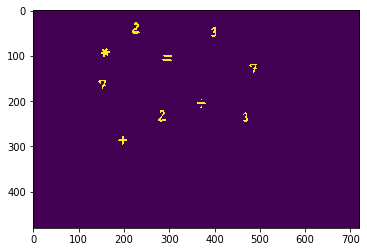

In [45]:
hsv = cv2.cvtColor(imgs[0],cv2.COLOR_BGR2HSV)
lower_range=np.array([0,100,120])
upper_range=np.array([300,300,150])
 
mask = cv2.inRange(hsv, lower_range, upper_range)

opening=skimage.morphology.area_opening(mask,area_threshold=80, connectivity=1);
opening=skimage.morphology.dilation(opening,square(5));

lower_range=np.array([0,0,0])
upper_range=np.array([200,300,140])
 
mask1 = cv2.inRange(hsv, lower_range, upper_range) # Threshold such that we can see nicely the numbers and operators
mask2 = skimage.morphology.area_opening(mask1,area_threshold=300, connectivity=1) #open such as the operators disappear
mask2 = skimage.morphology.dilation(mask2,square(30)); # dilate the rest and substract to obtain a cleanb image

mask1 = mask1 - mask2
mask1 = skimage.morphology.area_opening(mask1,area_threshold=5, connectivity=1) # Open one more time to clean a last time the image
mask1 = skimage.morphology.area_closing(mask1,area_threshold=10, connectivity=1) 

for i in range(480):
    for j in range(720):
        if mask1[i][j]< 255:
            mask1[i][j] = 0

#cv2.imshow('image', imtoan)
#cv2.imshow('mask', mask)
#cv2.imshow('res', res)
 
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(mask1)


51
53


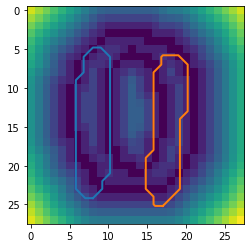

In [46]:
center = findCenter(100,300,mask1)
im = sampleImage(center, mask1)
rotated_img = imutils.rotate(im, 90) > 127
contours = measure.find_contours(rotated_img, 0.8)

fig, ax = plt.subplots()
ax.imshow(distanceMaps[0])

for n, contour in enumerate(contours):
    print(len(contour))
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

totx 13.385365853658536
toty 13.528455284552852
totx 26.733333333333334
toty 17.0
dist 16.819512195121945
totx 14.471544715447145
toty 13.385365853658536
totx 11.0
toty 26.733333333333334
dist 16.819512195121945
label 2
totx 14.239175257731954
toty 13.020618556701033
totx 17.04
toty 7.0
dist 8.821443298969077
totx 15.115463917525771
toty 14.154639175257742
totx 21.04
toty 17.0
dist 8.769896907216486
totx 13.940206185567002
toty 15.092783505154648
totx 11.040000000000001
toty 21.0
dist 8.807422680412353
totx 13.074226804123711
toty 13.83505154639176
totx 7.040000000000001
toty 11.0
dist 8.86927835051547
label 3
label 11
totx 8.062745098039219
toty 13.647058823529417
totx 17.569811320754702
toty 12.679245283018872
dist 10.474879763226028
totx 8.221818181818183
toty 12.472727272727273
totx 17.740350877192974
toty 13.543859649122812
dist 10.58966507177033
totx 8.766101694915255
toty 11.237288135593221
totx 18.003389830508485
toty 13.474576271186443
dist 11.474576271186452
totx 9.1728813559

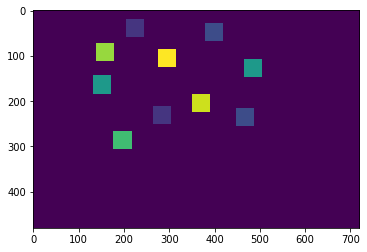

In [47]:
h,w = mask1.shape
T = 200
for i in range(h):
    for j in range(w): 
        if mask1[i][j] == 255:

            center = findCenter(i,j,mask1)
            sample = sampleImage(center, mask1)

            label = identify(sample, distanceMaps)
            print("label", label)
            
            for k in range(-20,20):
                for l in range(-20, 20):
                    #if mask1[int(center[0])+k][int(center[1])+l] != 0:
                    mask1[int(center[0])+k][int(center[1])+l] = label
                        
plt.imshow(mask1)

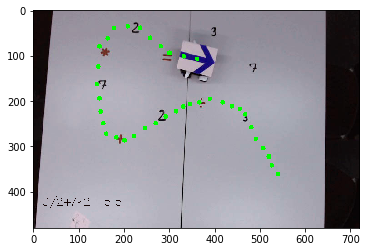

In [8]:
imgs_updated = imgs.copy()
centers = []
equation = []
formula = []
for i in range(len(imgs)-1):

    tmp = cv2.cvtColor(imgs[i],cv2.COLOR_BGR2HSV)
    lower_range=np.array([0,100,100])
    upper_range=np.array([300,300,300])

    mask = cv2.inRange(tmp, lower_range, upper_range)

    opening=skimage.morphology.area_opening(mask,area_threshold=1000, connectivity=1);
    opening=skimage.morphology.dilation(opening,square(5));
    
    centers.append(center_arrow(opening))
    
    for center in centers:
        imgs_updated[i] = cv2.circle(imgs_updated[i],(int(center[1]),int(center[0])), 5, (0,255,0), -1)
    
    if mask1[int(center[0])][int(center[1])] != 0:
        if len(equation) == 0:
            equation.append(mask1[int(center[0])][int(center[1])])
            formula.append(mask1[int(center[0])][int(center[1])])
        elif mask1[int(center[0])][int(center[1])] != equation[-1]:
            equation.append(mask1[int(center[0])][int(center[1])])
            formula.append(mask1[int(center[0])][int(center[1])])
    
    for n,j in enumerate(equation):
        if j == 9:
            formula[n] = "+"
        elif j == 10:
            formula[n] ="-"
        if j == 11:
            formula[n] ="*"
        elif j == 12:
            formula[n] ="/"
        elif j == 13:
            formula[n] = "="
             
        
        if len(formula) != 0:
            if formula[-1] == "=":
                formula.append(resolve(formula))
            
    for k in range(len(formula)):
        cv2.putText(imgs_updated[i], str(formula[k]), (20+15*k,430), cv2.FONT_HERSHEY_SIMPLEX, 0.8, cv2.LINE_AA)
        
    #cv2.imshow("test",imgs_updated[i]) 
    #cv2.waitKey(0)  
    #cv2.destroyAllWindows()  
plt.imshow(imgs_updated[-2])

In [9]:
fourcc = VideoWriter_fourcc(*'MP42')
video = cv2.VideoWriter('./project.avi',fourcc,float(2),(720,480))
for i in range(len(imgs)-1):
    video.write(imgs[i])
video.release()   


1